In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [5]:

class AgentState(TypedDict):
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state['message'] = f"Hey {state['message']}, how is your day going?"

    return state

In [6]:
graph = StateGraph(AgentState)
graph.add_node("greeter_func", greeting_node)
graph.set_entry_point("greeter_func")
graph.set_finish_point("greeter_func")

app = graph.compile()

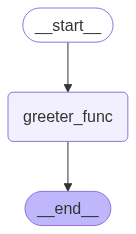

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({"message": "John"})

In [9]:
result["message"]

'Hey John, how is your day going?'

In [13]:
class StateSchema(TypedDict):
    name: str

def comp(state: StateSchema) -> StateSchema:
    state['name'] = f"{state['name']}, you're doing an amazing job learning Langgraph"
    return state

In [16]:
graph1 = StateGraph(StateSchema)
graph1.add_node("compliment", comp)
graph1.set_entry_point("compliment")
graph1.set_finish_point("compliment")

app1 = graph1.compile()

In [17]:
res = app1.invoke({"name":"Bobby"})

In [18]:
res["name"]

"Bobby, you're doing an amazing job learning Langgraph"